In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-30 19:00:00,242.060716,18.870796,71.072939,188.915151,91.471325,4.0,3.0,30.0,19.0
2020-04-30 20:00:00,218.655079,18.056864,75.132153,178.704750,84.176485,4.0,3.0,30.0,20.0
2020-04-30 21:00:00,194.147868,17.090891,81.315038,161.421792,73.858294,4.0,3.0,30.0,21.0
2020-04-30 22:00:00,206.432889,16.714085,82.568155,197.744043,83.279611,4.0,3.0,30.0,22.0
2020-04-30 23:00:00,173.577429,16.365121,83.662401,162.157636,68.669099,4.0,3.0,30.0,23.0


In [3]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [4]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,725.154408,25.795055,48.256857,57.532808,13.865109,10.0,2.0,2.0,12.0,5.384051
2019-10-07 10:00:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,135.822676,34.926112,35.013036,42.114260,10.075221,10.0,0.0,7.0,11.0,16.268034
2019-10-07 12:00:00,203.757758,36.201221,31.829282,45.701366,7.624153,10.0,0.0,7.0,12.0,12.770444


# CO DATA

In [6]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'
X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)
#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget":1440,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

[flaml.automl: 12-15 00:35:05] {2599} INFO - task = regression
[flaml.automl: 12-15 00:35:05] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 00:35:05] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 00:35:05] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 00:35:06] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 00:35:06] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 00:35:06] {3296} INFO - Estimated sufficient time budget=8126s. Estimated necessary time budget=8s.
[flaml.automl: 12-15 00:35:06] {3343} INFO -  at 1.0s,	estimator rf's best error=163.0386,	best estimator rf's best error=163.0386
[flaml.automl: 12-15 00:35:06] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12-15 00:35:07] {3343} INFO -  at 1.5s,	estimator rf's best error=147.8430,	best estimator rf's best error=147.8430
[flaml.automl: 12-15 00:35:07] {3166} INFO - iteration 2, current learner rf
[flaml.automl: 12-15 0

[flaml.automl: 12-15 00:37:05] {3166} INFO - iteration 37, current learner rf
[flaml.automl: 12-15 00:37:17] {3343} INFO -  at 132.0s,	estimator rf's best error=119.7368,	best estimator rf's best error=119.7368
[flaml.automl: 12-15 00:37:17] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 00:37:28] {3343} INFO -  at 142.9s,	estimator rf's best error=119.7368,	best estimator rf's best error=119.7368
[flaml.automl: 12-15 00:37:28] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 00:37:32] {3343} INFO -  at 146.4s,	estimator rf's best error=119.7368,	best estimator rf's best error=119.7368
[flaml.automl: 12-15 00:37:32] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 00:37:41] {3343} INFO -  at 156.1s,	estimator rf's best error=119.7368,	best estimator rf's best error=119.7368
[flaml.automl: 12-15 00:37:41] {3166} INFO - iteration 41, current learner rf
[flaml.automl: 12-15 00:37:45] {3343} INFO -  at 160.0s,	estimator rf's best e

[flaml.automl: 12-15 00:42:07] {3166} INFO - iteration 76, current learner rf
[flaml.automl: 12-15 00:42:14] {3343} INFO -  at 428.2s,	estimator rf's best error=119.3808,	best estimator rf's best error=119.3808
[flaml.automl: 12-15 00:42:14] {3166} INFO - iteration 77, current learner rf
[flaml.automl: 12-15 00:42:23] {3343} INFO -  at 438.1s,	estimator rf's best error=119.3808,	best estimator rf's best error=119.3808
[flaml.automl: 12-15 00:42:23] {3166} INFO - iteration 78, current learner rf
[flaml.automl: 12-15 00:42:30] {3343} INFO -  at 444.9s,	estimator rf's best error=119.3808,	best estimator rf's best error=119.3808
[flaml.automl: 12-15 00:42:30] {3166} INFO - iteration 79, current learner rf
[flaml.automl: 12-15 00:42:41] {3343} INFO -  at 456.1s,	estimator rf's best error=119.1689,	best estimator rf's best error=119.1689
[flaml.automl: 12-15 00:42:41] {3166} INFO - iteration 80, current learner rf
[flaml.automl: 12-15 00:42:50] {3343} INFO -  at 464.2s,	estimator rf's best e

[flaml.automl: 12-15 00:55:50] {3166} INFO - iteration 115, current learner rf
[flaml.automl: 12-15 00:56:16] {3343} INFO -  at 1271.0s,	estimator rf's best error=118.8760,	best estimator rf's best error=118.8760
[flaml.automl: 12-15 00:56:16] {3166} INFO - iteration 116, current learner rf
[flaml.automl: 12-15 00:56:35] {3343} INFO -  at 1289.5s,	estimator rf's best error=118.8760,	best estimator rf's best error=118.8760
[flaml.automl: 12-15 00:56:35] {3166} INFO - iteration 117, current learner rf
[flaml.automl: 12-15 00:57:18] {3343} INFO -  at 1332.5s,	estimator rf's best error=118.8760,	best estimator rf's best error=118.8760
[flaml.automl: 12-15 00:57:18] {3166} INFO - iteration 118, current learner rf
[flaml.automl: 12-15 00:57:36] {3343} INFO -  at 1350.7s,	estimator rf's best error=118.8760,	best estimator rf's best error=118.8760
[flaml.automl: 12-15 00:57:36] {3166} INFO - iteration 119, current learner rf
[flaml.automl: 12-15 00:58:25] {3343} INFO -  at 1399.6s,	estimator r

[flaml.automl: 12-15 01:08:46] {3166} INFO - iteration 28, current learner rf
[flaml.automl: 12-15 01:09:30] {3343} INFO -  at 608.0s,	estimator rf's best error=123.8258,	best estimator rf's best error=123.8258
[flaml.automl: 12-15 01:09:30] {3166} INFO - iteration 29, current learner rf
[flaml.automl: 12-15 01:10:13] {3343} INFO -  at 650.3s,	estimator rf's best error=123.8258,	best estimator rf's best error=123.8258
[flaml.automl: 12-15 01:10:13] {3166} INFO - iteration 30, current learner rf
[flaml.automl: 12-15 01:10:40] {3343} INFO -  at 677.6s,	estimator rf's best error=123.8258,	best estimator rf's best error=123.8258
[flaml.automl: 12-15 01:10:40] {3166} INFO - iteration 31, current learner rf
[flaml.automl: 12-15 01:11:50] {3343} INFO -  at 747.6s,	estimator rf's best error=123.8258,	best estimator rf's best error=123.8258
[flaml.automl: 12-15 01:11:50] {3166} INFO - iteration 32, current learner rf
[flaml.automl: 12-15 01:12:37] {3343} INFO -  at 794.4s,	estimator rf's best e

[flaml.automl: 12-15 01:23:33] {3166} INFO - iteration 14, current learner rf
[flaml.automl: 12-15 01:23:42] {3343} INFO -  at 40.8s,	estimator rf's best error=119.8639,	best estimator rf's best error=119.8639
[flaml.automl: 12-15 01:23:42] {3166} INFO - iteration 15, current learner rf
[flaml.automl: 12-15 01:23:44] {3343} INFO -  at 43.4s,	estimator rf's best error=119.8639,	best estimator rf's best error=119.8639
[flaml.automl: 12-15 01:23:44] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 01:23:55] {3343} INFO -  at 53.7s,	estimator rf's best error=119.8639,	best estimator rf's best error=119.8639
[flaml.automl: 12-15 01:23:55] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 01:24:03] {3343} INFO -  at 62.5s,	estimator rf's best error=118.2957,	best estimator rf's best error=118.2957
[flaml.automl: 12-15 01:24:03] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 01:24:08] {3343} INFO -  at 66.8s,	estimator rf's best error=

[flaml.automl: 12-15 01:47:34] {3166} INFO - iteration 3, current learner rf
[flaml.automl: 12-15 01:47:36] {3343} INFO -  at 6.9s,	estimator rf's best error=145.6584,	best estimator rf's best error=145.6584
[flaml.automl: 12-15 01:47:36] {3166} INFO - iteration 4, current learner rf
[flaml.automl: 12-15 01:47:38] {3343} INFO -  at 8.9s,	estimator rf's best error=143.3617,	best estimator rf's best error=143.3617
[flaml.automl: 12-15 01:47:38] {3166} INFO - iteration 5, current learner rf
[flaml.automl: 12-15 01:47:40] {3343} INFO -  at 10.5s,	estimator rf's best error=143.3617,	best estimator rf's best error=143.3617
[flaml.automl: 12-15 01:47:40] {3166} INFO - iteration 6, current learner rf
[flaml.automl: 12-15 01:47:41] {3343} INFO -  at 11.9s,	estimator rf's best error=141.4749,	best estimator rf's best error=141.4749
[flaml.automl: 12-15 01:47:41] {3166} INFO - iteration 7, current learner rf
[flaml.automl: 12-15 01:47:43] {3343} INFO -  at 13.6s,	estimator rf's best error=141.474

[flaml.automl: 12-15 02:10:51] {3602} INFO - retrain rf for 25.9s
[flaml.automl: 12-15 02:10:51] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.5149332597827616, max_leaf_nodes=717,
                      n_estimators=834, n_jobs=-1)
[flaml.automl: 12-15 02:10:51] {2901} INFO - fit succeeded
[flaml.automl: 12-15 02:10:51] {2902} INFO - Time taken to find the best model: 978.3753688335419
[flaml.automl: 12-15 02:10:52] {2599} INFO - task = regression
[flaml.automl: 12-15 02:10:52] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 02:10:52] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 02:10:52] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 02:10:52] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 02:10:52] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 02:10:53] {3296} INFO - Estimated sufficient time budget=12454s. Estimated necessary time budget=12s.
[flaml.automl: 12-15 02:1

[flaml.automl: 12-15 02:18:00] {3166} INFO - iteration 35, current learner rf
[flaml.automl: 12-15 02:18:35] {3343} INFO -  at 463.3s,	estimator rf's best error=127.4392,	best estimator rf's best error=127.4392
[flaml.automl: 12-15 02:18:35] {3166} INFO - iteration 36, current learner rf
[flaml.automl: 12-15 02:19:40] {3343} INFO -  at 527.9s,	estimator rf's best error=127.4212,	best estimator rf's best error=127.4212
[flaml.automl: 12-15 02:19:40] {3166} INFO - iteration 37, current learner rf
[flaml.automl: 12-15 02:20:14] {3343} INFO -  at 561.9s,	estimator rf's best error=127.0642,	best estimator rf's best error=127.0642
[flaml.automl: 12-15 02:20:14] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 02:21:10] {3343} INFO -  at 618.1s,	estimator rf's best error=127.0642,	best estimator rf's best error=127.0642
[flaml.automl: 12-15 02:21:10] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 02:21:32] {3343} INFO -  at 639.6s,	estimator rf's best e

[flaml.automl: 12-15 02:34:55] {3166} INFO - iteration 9, current learner rf
[flaml.automl: 12-15 02:34:58] {3343} INFO -  at 18.6s,	estimator rf's best error=130.8393,	best estimator rf's best error=130.8393
[flaml.automl: 12-15 02:34:58] {3166} INFO - iteration 10, current learner rf
[flaml.automl: 12-15 02:35:02] {3343} INFO -  at 22.3s,	estimator rf's best error=130.8393,	best estimator rf's best error=130.8393
[flaml.automl: 12-15 02:35:02] {3166} INFO - iteration 11, current learner rf
[flaml.automl: 12-15 02:35:03] {3343} INFO -  at 23.8s,	estimator rf's best error=130.8393,	best estimator rf's best error=130.8393
[flaml.automl: 12-15 02:35:03] {3166} INFO - iteration 12, current learner rf
[flaml.automl: 12-15 02:35:06] {3343} INFO -  at 27.2s,	estimator rf's best error=127.9682,	best estimator rf's best error=127.9682
[flaml.automl: 12-15 02:35:06] {3166} INFO - iteration 13, current learner rf
[flaml.automl: 12-15 02:35:09] {3343} INFO -  at 29.9s,	estimator rf's best error=1

[flaml.automl: 12-15 02:58:11] {2913} WARNING - Time taken to find the best model is 73% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 12-15 02:58:11] {2599} INFO - task = regression
[flaml.automl: 12-15 02:58:11] {2601} INFO - Data split method: uniform
[flaml.automl: 12-15 02:58:11] {2604} INFO - Evaluation method: cv
[flaml.automl: 12-15 02:58:11] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-15 02:58:11] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-15 02:58:11] {3166} INFO - iteration 0, current learner rf
[flaml.automl: 12-15 02:58:12] {3296} INFO - Estimated sufficient time budget=10022s. Estimated necessary time budget=10s.
[flaml.automl: 12-15 02:58:12] {3343} INFO -  at 1.3s,	estimator rf's best error=162.0955,	best estimator rf's best error=162.0955
[flaml.automl: 12-15 02:58:12] {3166} INFO - iteration 1, current learner rf
[flaml.automl: 12

[flaml.automl: 12-15 03:02:45] {3166} INFO - iteration 36, current learner rf
[flaml.automl: 12-15 03:03:23] {3343} INFO -  at 311.7s,	estimator rf's best error=125.1647,	best estimator rf's best error=125.1647
[flaml.automl: 12-15 03:03:23] {3166} INFO - iteration 37, current learner rf
[flaml.automl: 12-15 03:03:57] {3343} INFO -  at 346.0s,	estimator rf's best error=125.1647,	best estimator rf's best error=125.1647
[flaml.automl: 12-15 03:03:57] {3166} INFO - iteration 38, current learner rf
[flaml.automl: 12-15 03:04:03] {3343} INFO -  at 352.0s,	estimator rf's best error=125.1647,	best estimator rf's best error=125.1647
[flaml.automl: 12-15 03:04:03] {3166} INFO - iteration 39, current learner rf
[flaml.automl: 12-15 03:04:30] {3343} INFO -  at 378.8s,	estimator rf's best error=125.1647,	best estimator rf's best error=125.1647
[flaml.automl: 12-15 03:04:30] {3166} INFO - iteration 40, current learner rf
[flaml.automl: 12-15 03:04:39] {3343} INFO -  at 388.3s,	estimator rf's best e

[flaml.automl: 12-15 03:16:50] {3166} INFO - iteration 75, current learner rf
[flaml.automl: 12-15 03:17:03] {3343} INFO -  at 1131.7s,	estimator rf's best error=125.0628,	best estimator rf's best error=125.0628
[flaml.automl: 12-15 03:17:03] {3166} INFO - iteration 76, current learner rf
[flaml.automl: 12-15 03:17:21] {3343} INFO -  at 1150.2s,	estimator rf's best error=125.0628,	best estimator rf's best error=125.0628
[flaml.automl: 12-15 03:17:21] {3166} INFO - iteration 77, current learner rf
[flaml.automl: 12-15 03:17:33] {3343} INFO -  at 1162.0s,	estimator rf's best error=125.0628,	best estimator rf's best error=125.0628
[flaml.automl: 12-15 03:17:33] {3166} INFO - iteration 78, current learner rf
[flaml.automl: 12-15 03:17:54] {3343} INFO -  at 1183.0s,	estimator rf's best error=125.0628,	best estimator rf's best error=125.0628
[flaml.automl: 12-15 03:17:54] {3166} INFO - iteration 79, current learner rf
[flaml.automl: 12-15 03:18:04] {3343} INFO -  at 1193.0s,	estimator rf's b

[flaml.automl: 12-15 03:22:44] {3166} INFO - iteration 14, current learner rf
[flaml.automl: 12-15 03:22:50] {3343} INFO -  at 40.8s,	estimator rf's best error=125.1889,	best estimator rf's best error=125.1889
[flaml.automl: 12-15 03:22:50] {3166} INFO - iteration 15, current learner rf
[flaml.automl: 12-15 03:23:06] {3343} INFO -  at 57.5s,	estimator rf's best error=122.3069,	best estimator rf's best error=122.3069
[flaml.automl: 12-15 03:23:06] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 03:23:14] {3343} INFO -  at 65.5s,	estimator rf's best error=122.3069,	best estimator rf's best error=122.3069
[flaml.automl: 12-15 03:23:14] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 03:23:55] {3343} INFO -  at 106.6s,	estimator rf's best error=122.3069,	best estimator rf's best error=122.3069
[flaml.automl: 12-15 03:23:55] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 03:24:34] {3343} INFO -  at 144.9s,	estimator rf's best erro

[flaml.automl: 12-15 03:45:53] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 03:45:56] {3343} INFO -  at 46.3s,	estimator rf's best error=125.6956,	best estimator rf's best error=125.6956
[flaml.automl: 12-15 03:45:56] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 03:46:08] {3343} INFO -  at 58.5s,	estimator rf's best error=125.3982,	best estimator rf's best error=125.3982
[flaml.automl: 12-15 03:46:08] {3166} INFO - iteration 18, current learner rf
[flaml.automl: 12-15 03:46:30] {3343} INFO -  at 80.4s,	estimator rf's best error=125.2129,	best estimator rf's best error=125.2129
[flaml.automl: 12-15 03:46:30] {3166} INFO - iteration 19, current learner rf
[flaml.automl: 12-15 03:46:43] {3343} INFO -  at 93.5s,	estimator rf's best error=125.0816,	best estimator rf's best error=125.0816
[flaml.automl: 12-15 03:46:43] {3166} INFO - iteration 20, current learner rf
[flaml.automl: 12-15 03:47:03] {3343} INFO -  at 113.4s,	estimator rf's best error

[flaml.automl: 12-15 03:56:02] {3166} INFO - iteration 55, current learner rf
[flaml.automl: 12-15 03:56:20] {3343} INFO -  at 670.6s,	estimator rf's best error=123.4195,	best estimator rf's best error=123.4195
[flaml.automl: 12-15 03:56:20] {3166} INFO - iteration 56, current learner rf
[flaml.automl: 12-15 03:56:39] {3343} INFO -  at 689.8s,	estimator rf's best error=123.4195,	best estimator rf's best error=123.4195
[flaml.automl: 12-15 03:56:39] {3166} INFO - iteration 57, current learner rf
[flaml.automl: 12-15 03:56:48] {3343} INFO -  at 698.2s,	estimator rf's best error=123.4195,	best estimator rf's best error=123.4195
[flaml.automl: 12-15 03:56:48] {3166} INFO - iteration 58, current learner rf
[flaml.automl: 12-15 03:57:03] {3343} INFO -  at 713.1s,	estimator rf's best error=123.4195,	best estimator rf's best error=123.4195
[flaml.automl: 12-15 03:57:03] {3166} INFO - iteration 59, current learner rf
[flaml.automl: 12-15 03:57:11] {3343} INFO -  at 721.1s,	estimator rf's best e

[flaml.automl: 12-15 04:04:43] {3166} INFO - iteration 94, current learner rf
[flaml.automl: 12-15 04:04:56] {3343} INFO -  at 1186.3s,	estimator rf's best error=123.3653,	best estimator rf's best error=123.3653
[flaml.automl: 12-15 04:04:56] {3166} INFO - iteration 95, current learner rf
[flaml.automl: 12-15 04:05:08] {3343} INFO -  at 1198.7s,	estimator rf's best error=123.3653,	best estimator rf's best error=123.3653
[flaml.automl: 12-15 04:05:08] {3166} INFO - iteration 96, current learner rf
[flaml.automl: 12-15 04:05:28] {3343} INFO -  at 1218.4s,	estimator rf's best error=123.3653,	best estimator rf's best error=123.3653
[flaml.automl: 12-15 04:05:28] {3166} INFO - iteration 97, current learner rf
[flaml.automl: 12-15 04:05:36] {3343} INFO -  at 1226.2s,	estimator rf's best error=123.3653,	best estimator rf's best error=123.3653
[flaml.automl: 12-15 04:05:36] {3166} INFO - iteration 98, current learner rf
[flaml.automl: 12-15 04:05:43] {3343} INFO -  at 1233.0s,	estimator rf's b

[flaml.automl: 12-15 04:09:31] {3166} INFO - iteration 13, current learner rf
[flaml.automl: 12-15 04:09:37] {3343} INFO -  at 33.6s,	estimator rf's best error=125.0131,	best estimator rf's best error=125.0131
[flaml.automl: 12-15 04:09:37] {3166} INFO - iteration 14, current learner rf
[flaml.automl: 12-15 04:09:41] {3343} INFO -  at 37.7s,	estimator rf's best error=125.0131,	best estimator rf's best error=125.0131
[flaml.automl: 12-15 04:09:41] {3166} INFO - iteration 15, current learner rf
[flaml.automl: 12-15 04:09:50] {3343} INFO -  at 46.4s,	estimator rf's best error=122.4600,	best estimator rf's best error=122.4600
[flaml.automl: 12-15 04:09:50] {3166} INFO - iteration 16, current learner rf
[flaml.automl: 12-15 04:09:53] {3343} INFO -  at 49.6s,	estimator rf's best error=122.4600,	best estimator rf's best error=122.4600
[flaml.automl: 12-15 04:09:53] {3166} INFO - iteration 17, current learner rf
[flaml.automl: 12-15 04:10:15] {3343} INFO -  at 71.5s,	estimator rf's best error=

[flaml.automl: 12-15 04:23:12] {3166} INFO - iteration 52, current learner rf
[flaml.automl: 12-15 04:23:42] {3343} INFO -  at 878.4s,	estimator rf's best error=120.6673,	best estimator rf's best error=120.6673
[flaml.automl: 12-15 04:23:42] {3166} INFO - iteration 53, current learner rf
[flaml.automl: 12-15 04:23:56] {3343} INFO -  at 893.2s,	estimator rf's best error=120.6673,	best estimator rf's best error=120.6673
[flaml.automl: 12-15 04:23:56] {3166} INFO - iteration 54, current learner rf
[flaml.automl: 12-15 04:24:10] {3343} INFO -  at 907.0s,	estimator rf's best error=120.6673,	best estimator rf's best error=120.6673
[flaml.automl: 12-15 04:24:10] {3166} INFO - iteration 55, current learner rf
[flaml.automl: 12-15 04:24:40] {3343} INFO -  at 936.4s,	estimator rf's best error=120.6673,	best estimator rf's best error=120.6673
[flaml.automl: 12-15 04:24:40] {3166} INFO - iteration 56, current learner rf
[flaml.automl: 12-15 04:25:09] {3343} INFO -  at 966.3s,	estimator rf's best e

0.95 0.9 0.27


from flaml import AutoML
from sklearn.datasets import fetch_california_housing
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 180,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 21600,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["extra_tree"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

In [8]:
X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

(3778, 8)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

3534

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# SO2 DATA

In [10]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [11]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

(60913, 11)

In [12]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

,WE,AE,Temp,RH,Ref,Lab2,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,,,
2019-10-10 04:00:00,344.013811,342.484305,18.332589,82.373211,1.190555,9.990807,1.529506,10.0,3.0,10.0,4.0
2019-10-10 05:00:00,347.947204,342.688948,18.160512,83.041499,1.517400,21.173371,5.258256,10.0,3.0,10.0,5.0
2019-10-10 06:00:00,349.586425,342.643169,18.294731,80.755815,1.596648,26.255508,6.943256,10.0,3.0,10.0,6.0
2019-10-10 07:00:00,348.280332,342.545156,21.874264,74.161148,1.518688,22.449829,5.735176,10.0,3.0,10.0,7.0
2019-10-10 08:00:00,352.303813,345.041354,29.141688,59.611152,1.379748,23.209242,7.262459,10.0,3.0,10.0,8.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

1996

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [1]:
import pandas as pd
from pandas import MultiIndex, Int16Dtype
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [2]:
from platform import python_version
 
 
print("Current Python Version-", python_version())

Current Python Version- 3.8.6


In [3]:
import numpy
numpy.version.version

'1.23.5'

In [4]:
import random
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('CO.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO['Ref']=Ref_CO
index_names = Data_CO[ (Data_CO['WE'] >1000)].index
Data_CO.drop(index_names, inplace = True)
WE=Data_CO['WE'].to_list()
AE=Data_CO['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
data = pd.read_csv('Conc_CO.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_CO=data
Data_CO.drop(index_names, inplace = True)
signal=np.array(WE)-np.array(AE)
Data_CO['Net Signal']=signal
Data_CO['Month']=Data_CO.index.month
Data_CO['Day_of_week']=Data_CO.index.dayofweek
Data_CO['Day']=Data_CO.index.day
Data_CO['Hour']=Data_CO.index.hour
CO_Data=Data_CO
CO_Data=CO_Data[(CO_Data[CO_Data.columns] >= 0).all(axis=1)]
CO_Data=CO_Data.dropna()
CO_Data=CO_Data.resample('h').mean()
CO_Data=CO_Data.dropna()
CO_Data.tail()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour
Date,,,,,,,,,
2020-04-30 19:00:00,242.060716,18.870796,71.072939,188.915151,91.471325,4.0,3.0,30.0,19.0
2020-04-30 20:00:00,218.655079,18.056864,75.132153,178.704750,84.176485,4.0,3.0,30.0,20.0
2020-04-30 21:00:00,194.147868,17.090891,81.315038,161.421792,73.858294,4.0,3.0,30.0,21.0
2020-04-30 22:00:00,206.432889,16.714085,82.568155,197.744043,83.279611,4.0,3.0,30.0,22.0
2020-04-30 23:00:00,173.577429,16.365121,83.662401,162.157636,68.669099,4.0,3.0,30.0,23.0


In [5]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna() 
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

ref_O3=Data_O3['Ref'].to_list()
len(ref_O3)

60913

In [6]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('NO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
Data_NO2['Ref']=Ref_NO2
WE=Data_NO2['WE'].to_list()
AE=Data_NO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
data = pd.read_csv('Conc_NO2.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉") 
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_NO2=data
signal=np.array(WE)-np.array(AE)
Data_NO2['Net Signal']=signal
Data_NO2['Month']=Data_NO2.index.month
Data_NO2['Day_of_week']=Data_NO2.index.dayofweek
Data_NO2['Day']=Data_NO2.index.day
Data_NO2['Hour']=Data_NO2.index.hour
Data_NO2['Ref_O3']=ref_O3
NO2_Data=Data_NO2
NO2_Data=NO2_Data[(NO2_Data[NO2_Data.columns] >= 0).all(axis=1)]
NO2_Data=NO2_Data.dropna()
NO2_Data=NO2_Data.resample('h').mean()
NO2_Data=NO2_Data.dropna()

In [7]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('O3.txt', header = None,low_memory=False)
data.columns=['AE','WE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
Data_O3['Ref']=Ref_O3
WE=Data_O3['WE'].to_list()
AE=Data_O3['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
data = pd.read_csv('Conc_O3.txt', header = None,low_memory=False)
data.columns=['Lab1','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_O3=data
signal=np.array(WE)-np.array(AE)
Data_O3['Net Signal']=signal
Data_O3['Month']=Data_O3.index.month
Data_O3['Day_of_week']=Data_O3.index.dayofweek
Data_O3['Day']=Data_O3.index.day
Data_O3['Hour']=Data_O3.index.hour
ref_NO2=Data_NO2['Ref'].to_list()
Data_O3['Ref_NO2']=ref_NO2
O3_Data=Data_O3
O3_Data=O3_Data[(O3_Data[O3_Data.columns] >= 0).all(axis=1)]
O3_Data=O3_Data.dropna()
O3_Data=O3_Data.resample('h').mean()
O3_Data=O3_Data.dropna()
O3_Data.head()

,Lab1,Temp,RH,Ref,Net Signal,Month,Day_of_week,Day,Hour,Ref_NO2
Date,,,,,,,,,,
2019-10-02 11:00:00,621.625704,26.378438,58.063437,46.094860,3.605625,10.0,2.0,2.0,11.0,15.230400
2019-10-02 12:00:00,725.154408,25.795055,48.256857,57.532808,13.865109,10.0,2.0,2.0,12.0,5.384051
2019-10-07 10:00:00,108.196313,32.344264,37.260757,47.259008,11.447809,10.0,0.0,7.0,10.0,4.255772
2019-10-07 11:00:00,135.822676,34.926112,35.013036,42.114260,10.075221,10.0,0.0,7.0,11.0,16.268034
2019-10-07 12:00:00,203.757758,36.201221,31.829282,45.701366,7.624153,10.0,0.0,7.0,12.0,12.770444


# CO DATA

In [8]:
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from flaml import AutoML
from sklearn.datasets import fetch_california_housing
#'Ref_NO2','Ref_SO2','Ref_O3',
#,'Month','Day_of_week','Day','Hour'

#train_test_split(X, y, test_size = 0.2)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [9]:
from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator

In [10]:
df1=[x for _, x in CO_Data.groupby('Month')]
data_oct=df1[4]
#data_oct=data_oct.sample(frac=1)
data_nov=df1[5]
#data_nov=data_nov.sample(frac=1)
data_dec=df1[6]
#data_dec=data_dec.sample(frac=1)
data_jan=df1[0]
#data_jan=data_jan.sample(frac=1)
data_feb=df1[1]
#data_feb=data_feb.sample(frac=1)
data_mar=df1[2]
#data_mar=data_mar.sample(frac=1)
data_apr=df1[3]
#data_apr=data_apr.sample(frac=1)
data=[data_oct,data_nov,data_dec,data_jan,data_feb,data_mar]

In [11]:
data_Oct=data_oct.resample('60min').mean()
data_Oct=data_Oct.dropna()
data_Nov=data_nov.resample('60min').mean()
data_Nov=data_Nov.dropna()
data_Dec=data_dec.resample('60min').mean()
data_Dec=data_Dec.dropna()
data_Jan=data_jan.resample('60min').mean()
data_Jan=data_Jan.dropna()
data_Feb=data_feb.resample('60min').mean()
data_Feb=data_Feb.dropna()
data_Mar=data_mar.resample('60min').mean()
data_Mar=data_Mar.dropna()
data_Apr=data_apr.resample('60min').mean()
data_Apr=data_Apr.dropna()

In [12]:
co_data=CO_Data
co_data=co_data.resample('60min').mean()
co_data=co_data.dropna()
X=co_data[['Net Signal','Temp','RH','Month','Day_of_week','Hour']]
y=co_data['Ref']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
pred=automl.predict(X_test)
rmse_r=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y_test),2)

[flaml.automl: 12-19 16:07:14] {2599} INFO - task = regression
[flaml.automl: 12-19 16:07:14] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:07:14] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:07:14] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:07:14] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:07:14] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:14] {3296} INFO - Estimated sufficient time budget=1216s. Estimated necessary t

[flaml.automl: 12-19 16:07:16] {3343} INFO -  at 1.8s,	estimator rf's best error=126.4348,	best estimator rf's best error=126.4348
[flaml.automl: 12-19 16:07:16] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:16] {3343} INFO -  at 2.0s,	estimator rf's best error=126.4348,	best estimator rf's best error=126.4348
[flaml.automl: 12-19 16:07:16] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:07:19] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:19] {3343} INFO -  at 4.7s,	estimator rf's best error=124.0835,	best estimator rf's best error=124.0835
[flaml.automl: 12-19 16:07:19] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consisten

[flaml.automl: 12-19 16:07:21] {3343} INFO -  at 7.1s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:21] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:22] {3343} INFO -  at 7.5s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:22] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:07:24] {3343} INFO -  at 10.3s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:24] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:25] {3343} INFO -  at 10.5s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:25] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:07:27] {3343} INFO -  at 12.9s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:27] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:27] {3343} INFO -  at 13.1s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:27] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:07:30] {3343} INFO -  at 15.8s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:30] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:30] {3343} INFO -  at 16.1s,	estimator rf's best error=123.2701,	best estimator rf's best error=123.2701
[flaml.automl: 12-19 16:07:30] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:07:33] {3343} INFO -  at 18.9s,	estimator rf's best error=121.9772,	best estimator rf's best error=121.9772
[flaml.automl: 12-19 16:07:33] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:33] {3343} INFO -  at 19.1s,	estimator rf's best error=121.9772,	best estimator rf's best error=121.9772
[flaml.automl: 12-19 16:07:33] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:07:36] {3343} INFO -  at 22.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:36] {3343} INFO -  at 22.2s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:36] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:07:40] {3343} INFO -  at 25.4s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:40] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:40] {3343} INFO -  at 25.8s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:40] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:07:43] {3343} INFO -  at 29.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:43] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:44] {3343} INFO -  at 29.7s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:44] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:07:48] {3343} INFO -  at 33.4s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:48] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:48] {3343} INFO -  at 33.9s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:48] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:07:52] {3343} INFO -  at 38.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:52] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:53] {3343} INFO -  at 38.4s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:53] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:07:57] {3343} INFO -  at 42.5s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:57] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:07:57] {3343} INFO -  at 42.8s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:07:57] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:01] {3343} INFO -  at 46.5s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:01] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:01] {3343} INFO -  at 46.8s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:01] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:05] {3343} INFO -  at 50.9s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:05] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:06] {3343} INFO -  at 51.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:06] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:09] {3343} INFO -  at 55.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:09] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:09] {3343} INFO -  at 55.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:09] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:14] {3343} INFO -  at 59.7s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:14] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:14] {3343} INFO -  at 60.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:14] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:18] {3343} INFO -  at 63.9s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:18] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:18] {3343} INFO -  at 64.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:18] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:23] {3343} INFO -  at 68.5s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:23] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:23] {3343} INFO -  at 68.9s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:23] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:27] {3343} INFO -  at 73.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:27] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:28] {3343} INFO -  at 73.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:28] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:31] {3343} INFO -  at 77.3s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:31] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:32] {3343} INFO -  at 77.6s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:32] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:36] {3343} INFO -  at 81.6s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:36] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:36] {3343} INFO -  at 82.0s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:36] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:40] {3343} INFO -  at 85.7s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:40] {3166} INFO - iteration 298, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:40] {3343} INFO -  at 86.1s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:40] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:44] {3343} INFO -  at 89.8s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:44] {3166} INFO - iteration 311, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:44] {3343} INFO -  at 90.1s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:44] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:48] {3343} INFO -  at 94.2s,	estimator rf's best error=121.0671,	best estimator rf's best error=121.0671
[flaml.automl: 12-19 16:08:48] {3166} INFO - iteration 324, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:49] {3343} INFO -  at 94.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:08:49] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:08:52] {3166} INFO - iteration 337, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:53] {3343} INFO -  at 98.6s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:08:53] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consis

[flaml.automl: 12-19 16:08:57] {3343} INFO -  at 102.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:08:57] {3166} INFO - iteration 350, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:08:57] {3343} INFO -  at 103.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:08:57] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:01] {3343} INFO -  at 106.6s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:01] {3166} INFO - iteration 363, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:01] {3343} INFO -  at 107.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:01] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:05] {3343} INFO -  at 110.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:05] {3166} INFO - iteration 376, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:05] {3343} INFO -  at 110.9s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:05] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:09] {3343} INFO -  at 114.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:09] {3166} INFO - iteration 389, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:09] {3343} INFO -  at 114.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:09] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:13] {3343} INFO -  at 119.2s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:13] {3166} INFO - iteration 402, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:14] {3343} INFO -  at 119.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:14] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:18] {3343} INFO -  at 124.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:18] {3166} INFO - iteration 415, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:19] {3343} INFO -  at 124.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:19] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:22] {3343} INFO -  at 127.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:22] {3166} INFO - iteration 428, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:22] {3343} INFO -  at 128.1s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:22] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:26] {3343} INFO -  at 132.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:26] {3166} INFO - iteration 441, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:27] {3343} INFO -  at 132.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:27] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:31] {3343} INFO -  at 136.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:31] {3166} INFO - iteration 454, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:31] {3343} INFO -  at 136.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:31] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:35] {3343} INFO -  at 140.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:35] {3166} INFO - iteration 467, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:35] {3343} INFO -  at 140.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:35] {3166} INFO - iteration 468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:39] {3343} INFO -  at 144.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:39] {3166} INFO - iteration 480, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:39] {3343} INFO -  at 145.2s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:39] {3166} INFO - iteration 481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:43] {3343} INFO -  at 148.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:43] {3166} INFO - iteration 493, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:43] {3343} INFO -  at 149.1s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:43] {3166} INFO - iteration 494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:47] {3343} INFO -  at 153.2s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:47] {3166} INFO - iteration 506, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:48] {3343} INFO -  at 153.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:48] {3166} INFO - iteration 507, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:52] {3343} INFO -  at 157.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:52] {3166} INFO - iteration 519, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:52] {3343} INFO -  at 158.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:52] {3166} INFO - iteration 520, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:09:55] {3343} INFO -  at 161.2s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:55] {3166} INFO - iteration 532, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:09:56] {3343} INFO -  at 161.6s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:09:56] {3166} INFO - iteration 533, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:00] {3343} INFO -  at 165.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:00] {3166} INFO - iteration 545, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:00] {3343} INFO -  at 165.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:00] {3166} INFO - iteration 546, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:04] {3343} INFO -  at 169.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:04] {3166} INFO - iteration 558, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:04] {3343} INFO -  at 169.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:04] {3166} INFO - iteration 559, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:07] {3343} INFO -  at 173.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:07] {3166} INFO - iteration 571, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:08] {3343} INFO -  at 173.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:08] {3166} INFO - iteration 572, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:12] {3343} INFO -  at 177.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:12] {3166} INFO - iteration 584, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:12] {3343} INFO -  at 177.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:12] {3166} INFO - iteration 585, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:16] {3343} INFO -  at 181.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:16] {3166} INFO - iteration 597, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:16] {3343} INFO -  at 182.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:16] {3166} INFO - iteration 598, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:20] {3343} INFO -  at 186.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:20] {3166} INFO - iteration 610, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:20] {3343} INFO -  at 186.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:20] {3166} INFO - iteration 611, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:26] {3343} INFO -  at 191.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:26] {3166} INFO - iteration 623, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:26] {3343} INFO -  at 192.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:26] {3166} INFO - iteration 624, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:32] {3343} INFO -  at 197.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:32] {3166} INFO - iteration 636, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:32] {3343} INFO -  at 198.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:32] {3166} INFO - iteration 637, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:36] {3343} INFO -  at 201.9s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:36] {3166} INFO - iteration 649, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:37] {3343} INFO -  at 202.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:37] {3166} INFO - iteration 650, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:41] {3343} INFO -  at 206.6s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:41] {3166} INFO - iteration 662, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:41] {3343} INFO -  at 207.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:41] {3166} INFO - iteration 663, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:45] {3166} INFO - iteration 675, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:45] {3343} INFO -  at 210.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:45] {3166} INFO - iteration 676, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consi

[flaml.automl: 12-19 16:10:49] {3343} INFO -  at 214.7s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:49] {3166} INFO - iteration 688, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:49] {3343} INFO -  at 215.1s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:49] {3166} INFO - iteration 689, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:54] {3343} INFO -  at 219.6s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:54] {3166} INFO - iteration 701, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:54] {3343} INFO -  at 220.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:54] {3166} INFO - iteration 702, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:10:58] {3343} INFO -  at 224.1s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:58] {3166} INFO - iteration 714, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:10:59] {3343} INFO -  at 224.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:10:59] {3166} INFO - iteration 715, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:02] {3343} INFO -  at 227.9s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:02] {3166} INFO - iteration 727, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:02] {3343} INFO -  at 228.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:02] {3166} INFO - iteration 728, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:07] {3343} INFO -  at 232.4s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:07] {3166} INFO - iteration 740, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:07] {3343} INFO -  at 232.8s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:07] {3166} INFO - iteration 741, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:11] {3343} INFO -  at 236.5s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:11] {3166} INFO - iteration 753, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:11] {3343} INFO -  at 236.9s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:11] {3166} INFO - iteration 754, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:15] {3343} INFO -  at 241.0s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:15] {3166} INFO - iteration 766, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:16] {3343} INFO -  at 241.3s,	estimator rf's best error=120.6895,	best estimator rf's best error=120.6895
[flaml.automl: 12-19 16:11:16] {3166} INFO - iteration 767, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:19] {3343} INFO -  at 245.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:19] {3166} INFO - iteration 779, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:20] {3343} INFO -  at 245.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:20] {3166} INFO - iteration 780, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:24] {3343} INFO -  at 249.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:24] {3166} INFO - iteration 792, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:24] {3343} INFO -  at 250.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:24] {3166} INFO - iteration 793, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:28] {3343} INFO -  at 254.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:28] {3166} INFO - iteration 805, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:29] {3343} INFO -  at 254.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:29] {3166} INFO - iteration 806, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:33] {3343} INFO -  at 258.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:33] {3166} INFO - iteration 818, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:33] {3343} INFO -  at 259.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:33] {3166} INFO - iteration 819, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:38] {3343} INFO -  at 263.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:38] {3166} INFO - iteration 831, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:38] {3343} INFO -  at 264.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:38] {3166} INFO - iteration 832, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:42] {3343} INFO -  at 268.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:42] {3166} INFO - iteration 844, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:43] {3343} INFO -  at 268.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:43] {3166} INFO - iteration 845, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:47] {3343} INFO -  at 272.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:47] {3166} INFO - iteration 857, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:47] {3343} INFO -  at 273.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:47] {3166} INFO - iteration 858, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:52] {3343} INFO -  at 277.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:52] {3166} INFO - iteration 870, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:52] {3343} INFO -  at 278.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:52] {3166} INFO - iteration 871, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:11:56] {3343} INFO -  at 282.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:56] {3166} INFO - iteration 883, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:11:57] {3343} INFO -  at 282.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:11:57] {3166} INFO - iteration 884, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:01] {3343} INFO -  at 286.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:01] {3166} INFO - iteration 896, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:01] {3343} INFO -  at 286.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:01] {3166} INFO - iteration 897, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:05] {3343} INFO -  at 290.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:05] {3166} INFO - iteration 909, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:05] {3343} INFO -  at 291.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:05] {3166} INFO - iteration 910, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:09] {3343} INFO -  at 295.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:09] {3166} INFO - iteration 922, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:10] {3343} INFO -  at 295.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:10] {3166} INFO - iteration 923, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:14] {3343} INFO -  at 299.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:14] {3166} INFO - iteration 935, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:14] {3343} INFO -  at 299.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:14] {3166} INFO - iteration 936, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:18] {3343} INFO -  at 304.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:18] {3166} INFO - iteration 948, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:19] {3343} INFO -  at 304.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:19] {3166} INFO - iteration 949, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:23] {3343} INFO -  at 309.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:23] {3166} INFO - iteration 961, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:23] {3343} INFO -  at 309.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:23] {3166} INFO - iteration 962, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:28] {3343} INFO -  at 313.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:28] {3166} INFO - iteration 974, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:28] {3343} INFO -  at 313.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:28] {3166} INFO - iteration 975, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:32] {3343} INFO -  at 318.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:32] {3166} INFO - iteration 987, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:33] {3343} INFO -  at 318.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:33] {3166} INFO - iteration 988, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:12:37] {3343} INFO -  at 322.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:37] {3166} INFO - iteration 1000, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:37] {3343} INFO -  at 322.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:37] {3166} INFO - iteration 1001, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:12:41] {3343} INFO -  at 326.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:41] {3166} INFO - iteration 1013, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:41] {3343} INFO -  at 327.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:41] {3166} INFO - iteration 1014, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:12:45] {3343} INFO -  at 331.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:45] {3166} INFO - iteration 1026, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:46] {3343} INFO -  at 331.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:46] {3166} INFO - iteration 1027, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:12:50] {3343} INFO -  at 335.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:50] {3166} INFO - iteration 1039, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:50] {3343} INFO -  at 335.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:50] {3166} INFO - iteration 1040, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:12:54] {3343} INFO -  at 339.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:54] {3166} INFO - iteration 1052, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:54] {3343} INFO -  at 339.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:54] {3166} INFO - iteration 1053, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:12:58] {3343} INFO -  at 343.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:58] {3166} INFO - iteration 1065, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:12:59] {3343} INFO -  at 344.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:12:59] {3166} INFO - iteration 1066, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:02] {3343} INFO -  at 348.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:02] {3166} INFO - iteration 1078, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:03] {3343} INFO -  at 348.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:03] {3166} INFO - iteration 1079, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:07] {3343} INFO -  at 352.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:07] {3166} INFO - iteration 1091, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:07] {3343} INFO -  at 352.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:07] {3166} INFO - iteration 1092, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:11] {3343} INFO -  at 357.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:11] {3166} INFO - iteration 1104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:11] {3343} INFO -  at 357.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:11] {3166} INFO - iteration 1105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:16] {3343} INFO -  at 361.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:16] {3166} INFO - iteration 1117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:16] {3343} INFO -  at 361.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:16] {3166} INFO - iteration 1118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:20] {3343} INFO -  at 366.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:20] {3166} INFO - iteration 1130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:21] {3343} INFO -  at 366.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:21] {3166} INFO - iteration 1131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:24] {3166} INFO - iteration 1143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:25] {3343} INFO -  at 370.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:25] {3166} INFO - iteration 1144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, con

[flaml.automl: 12-19 16:13:29] {3343} INFO -  at 374.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:29] {3166} INFO - iteration 1156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:29] {3343} INFO -  at 374.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:29] {3166} INFO - iteration 1157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:32] {3343} INFO -  at 378.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:32] {3166} INFO - iteration 1169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:33] {3343} INFO -  at 378.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:33] {3166} INFO - iteration 1170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:37] {3343} INFO -  at 382.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:37] {3166} INFO - iteration 1182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:37] {3343} INFO -  at 383.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:37] {3166} INFO - iteration 1183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:42] {3343} INFO -  at 387.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:42] {3166} INFO - iteration 1195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:42] {3343} INFO -  at 387.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:42] {3166} INFO - iteration 1196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:46] {3343} INFO -  at 391.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:46] {3166} INFO - iteration 1208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:46] {3343} INFO -  at 392.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:46] {3166} INFO - iteration 1209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:51] {3343} INFO -  at 397.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:51] {3166} INFO - iteration 1221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:52] {3343} INFO -  at 397.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:52] {3166} INFO - iteration 1222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:13:56] {3343} INFO -  at 401.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:56] {3166} INFO - iteration 1234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:13:56] {3343} INFO -  at 401.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:13:56] {3166} INFO - iteration 1235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:00] {3343} INFO -  at 405.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:00] {3166} INFO - iteration 1247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:00] {3343} INFO -  at 406.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:00] {3166} INFO - iteration 1248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:04] {3343} INFO -  at 409.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:04] {3166} INFO - iteration 1260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:04] {3343} INFO -  at 410.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:04] {3166} INFO - iteration 1261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:08] {3343} INFO -  at 413.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:08] {3166} INFO - iteration 1273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:08] {3343} INFO -  at 414.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:08] {3166} INFO - iteration 1274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:12] {3343} INFO -  at 418.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:12] {3166} INFO - iteration 1286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:13] {3343} INFO -  at 418.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:13] {3166} INFO - iteration 1287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:17] {3343} INFO -  at 422.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:17] {3166} INFO - iteration 1299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:17] {3343} INFO -  at 423.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:17] {3166} INFO - iteration 1300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:21] {3343} INFO -  at 426.8s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:21] {3166} INFO - iteration 1312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:21] {3343} INFO -  at 427.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:21] {3166} INFO - iteration 1313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:25] {3343} INFO -  at 431.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:25] {3166} INFO - iteration 1325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:26] {3343} INFO -  at 431.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:26] {3166} INFO - iteration 1326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:30] {3343} INFO -  at 435.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:30] {3166} INFO - iteration 1338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:30] {3343} INFO -  at 435.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:30] {3166} INFO - iteration 1339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:34] {3343} INFO -  at 439.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:34] {3166} INFO - iteration 1351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:34] {3343} INFO -  at 439.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:34] {3166} INFO - iteration 1352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:38] {3343} INFO -  at 443.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:38] {3166} INFO - iteration 1364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:38] {3343} INFO -  at 444.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:39] {3166} INFO - iteration 1365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:42] {3343} INFO -  at 448.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:42] {3166} INFO - iteration 1377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:42] {3343} INFO -  at 448.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:42] {3166} INFO - iteration 1378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:46] {3166} INFO - iteration 1390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:46] {3343} INFO -  at 452.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:46] {3166} INFO - iteration 1391, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, con

[flaml.automl: 12-19 16:14:51] {3343} INFO -  at 456.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:51] {3166} INFO - iteration 1403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:51] {3343} INFO -  at 456.6s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:51] {3166} INFO - iteration 1404, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:55] {3343} INFO -  at 460.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:55] {3166} INFO - iteration 1416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:14:55] {3343} INFO -  at 461.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:55] {3166} INFO - iteration 1417, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:14:59] {3343} INFO -  at 465.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:14:59] {3166} INFO - iteration 1429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:00] {3343} INFO -  at 465.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:00] {3166} INFO - iteration 1430, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:03] {3343} INFO -  at 469.2s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:03] {3166} INFO - iteration 1442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:04] {3343} INFO -  at 469.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:04] {3166} INFO - iteration 1443, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:08] {3343} INFO -  at 473.3s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:08] {3166} INFO - iteration 1455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:08] {3343} INFO -  at 473.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:08] {3166} INFO - iteration 1456, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:12] {3343} INFO -  at 478.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:12] {3166} INFO - iteration 1468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:13] {3343} INFO -  at 478.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:13] {3166} INFO - iteration 1469, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:16] {3343} INFO -  at 482.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:16] {3166} INFO - iteration 1481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:17] {3343} INFO -  at 482.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:17] {3166} INFO - iteration 1482, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:21] {3343} INFO -  at 486.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:21] {3166} INFO - iteration 1494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:21] {3343} INFO -  at 487.1s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:21] {3166} INFO - iteration 1495, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:26] {3343} INFO -  at 491.4s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:26] {3166} INFO - iteration 1507, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:26] {3343} INFO -  at 491.7s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:26] {3166} INFO - iteration 1508, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:30] {3343} INFO -  at 495.5s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:30] {3166} INFO - iteration 1520, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:30] {3343} INFO -  at 495.9s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:30] {3166} INFO - iteration 1521, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior

[flaml.automl: 12-19 16:15:34] {3343} INFO -  at 500.0s,	estimator rf's best error=117.5528,	best estimator rf's best error=117.5528
[flaml.automl: 12-19 16:15:34] {3602} INFO - retrain rf for 0.3s
[flaml.automl: 12-19 16:15:35] {3609} INFO - retrained model: RandomForestRegressor(max_features=0.7496750474155994, max_leaf_nodes=111,
                      n_estimators=16, n_jobs=-1)
[flaml.automl: 12-19 16:15:35] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:15:35] {2902} INFO - Time taken to find the best model: 241.86461186408997


In [13]:
from sklearn.neighbors import LocalOutlierFactor
A=['Net Signal','Temp','RH','Month','Day_of_week','Hour']
B='Ref'
frame1=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Mar]#,data_feb
Train1=pd.concat(frame1)
train1=Train1.sample(frac=1)
lof = LocalOutlierFactor()
yhat = lof.fit_predict(train1)
mask = yhat != -1
train1= train1[mask]
test1=data_Apr
yhat = lof.fit_predict(test1)
mask = yhat != -1
test1= test1[mask]

frame2=[data_Oct,data_Nov,data_Dec,data_Jan,data_Feb,data_Apr]#,data_feb
Train2=pd.concat(frame2)
train2=Train2.sample(frac=1)
yhat = lof.fit_predict(train2)
mask = yhat != -1
train2= train2[mask]
test2=data_Mar
yhat = lof.fit_predict(test2)
mask = yhat != -1
test2= test2[mask]

frame3=[data_Oct,data_Nov,data_Dec,data_Jan,data_Mar,data_Apr]#,data_feb
Train3=pd.concat(frame3)
train3=Train3.sample(frac=1)
yhat = lof.fit_predict(train3)
mask = yhat != -1
train3= train3[mask]
test3=data_Feb
yhat = lof.fit_predict(test3)
mask = yhat != -1
test3= test3[mask]

frame4=[data_Oct,data_Nov,data_Dec,data_Feb,data_Mar,data_Apr]#,data_feb
Train4=pd.concat(frame4)
train4=Train4.sample(frac=1)
yhat = lof.fit_predict(train4)
mask = yhat != -1
train4= train4[mask]
test4=data_Jan
yhat = lof.fit_predict(test4)
mask = yhat != -1
test4= test4[mask]

frame5=[data_Oct,data_Nov,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train5=pd.concat(frame5)
train5=Train5.sample(frac=1)
yhat = lof.fit_predict(train5)
mask = yhat != -1
train5= train5[mask]
test5=data_Dec
yhat = lof.fit_predict(test5)
mask = yhat != -1
test5= test5[mask]

frame6=[data_Oct,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train6=pd.concat(frame6)
train6=Train6.sample(frac=1)
yhat = lof.fit_predict(train6)
mask = yhat != -1
train6= train6[mask]
test6=data_Nov
yhat = lof.fit_predict(test6)
mask = yhat != -1
test6= test6[mask]

frame7=[data_Nov,data_Dec,data_Jan,data_Feb,data_Mar,data_Apr]#,data_feb
Train7=pd.concat(frame7)
train7=Train7.sample(frac=1)
yhat = lof.fit_predict(train7)
mask = yhat != -1
train7= train7[mask]
test7=data_Oct
yhat = lof.fit_predict(test7)
mask = yhat != -1
test7= test7[mask]


Train=[train1,train2,train3,train4,train5,train6,train7]
Test=[test1,test2,test3,test4,test5,test6,test7]

In [14]:
from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget":500,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

rmse=[]

# Train with labeled input data
for i in range(7):
    automl.fit(X_train=Train[i][A], y_train=Train[i][B],
           **automl_settings,estimator_list=["rf"])#,estimator_list=["xgboost"]
    pred=automl.predict(Test[i][A])
    R2=round(sm.r2_score(Test[i][B], pred), 2)
    r=round(np.corrcoef(Test[i][B], pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(Test[i][B], pred))/np.mean(Test[i][B]),2)
    rmse.append(RMSE)
    print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
#print(automl.model.estimator)

[flaml.automl: 12-19 16:15:36] {2599} INFO - task = regression
[flaml.automl: 12-19 16:15:36] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:15:36] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:15:37] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:15:37] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:15:37] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:37] {3296} INFO - Estimated sufficient time budget=2263s. Estimated necessary t

[flaml.automl: 12-19 16:15:40] {3343} INFO -  at 3.7s,	estimator rf's best error=107.4008,	best estimator rf's best error=107.4008
[flaml.automl: 12-19 16:15:40] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:40] {3343} INFO -  at 4.0s,	estimator rf's best error=107.4008,	best estimator rf's best error=107.4008
[flaml.automl: 12-19 16:15:40] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:15:45] {3343} INFO -  at 8.2s,	estimator rf's best error=104.0907,	best estimator rf's best error=104.0907
[flaml.automl: 12-19 16:15:45] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:45] {3343} INFO -  at 8.5s,	estimator rf's best error=104.0907,	best estimator rf's best error=104.0907
[flaml.automl: 12-19 16:15:45] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:15:49] {3343} INFO -  at 12.8s,	estimator rf's best error=104.0907,	best estimator rf's best error=104.0907
[flaml.automl: 12-19 16:15:49] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:49] {3343} INFO -  at 13.1s,	estimator rf's best error=102.8203,	best estimator rf's best error=102.8203
[flaml.automl: 12-19 16:15:49] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:15:55] {3343} INFO -  at 18.4s,	estimator rf's best error=102.8203,	best estimator rf's best error=102.8203
[flaml.automl: 12-19 16:15:55] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:15:55] {3343} INFO -  at 18.8s,	estimator rf's best error=102.8203,	best estimator rf's best error=102.8203
[flaml.automl: 12-19 16:15:55] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:16:00] {3343} INFO -  at 23.7s,	estimator rf's best error=101.6779,	best estimator rf's best error=101.6779
[flaml.automl: 12-19 16:16:00] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:00] {3343} INFO -  at 24.1s,	estimator rf's best error=101.6779,	best estimator rf's best error=101.6779
[flaml.automl: 12-19 16:16:00] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:16:05] {3343} INFO -  at 29.0s,	estimator rf's best error=101.6779,	best estimator rf's best error=101.6779
[flaml.automl: 12-19 16:16:05] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:06] {3343} INFO -  at 29.3s,	estimator rf's best error=101.6779,	best estimator rf's best error=101.6779
[flaml.automl: 12-19 16:16:06] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:16:12] {3343} INFO -  at 35.9s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:12] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:13] {3343} INFO -  at 36.9s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:13] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:16:23] {3343} INFO -  at 46.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:23] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:23] {3343} INFO -  at 46.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:23] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:16:33] {3343} INFO -  at 56.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:33] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:33] {3343} INFO -  at 56.9s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:33] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:16:43] {3343} INFO -  at 66.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:43] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:44] {3343} INFO -  at 68.1s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:44] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:16:54] {3343} INFO -  at 77.4s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:54] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:16:55] {3343} INFO -  at 78.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:16:55] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:17:10] {3343} INFO -  at 93.4s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:10] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:11] {3343} INFO -  at 94.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:11] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:17:29] {3343} INFO -  at 112.2s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:29] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:30] {3343} INFO -  at 113.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:30] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:17:51] {3343} INFO -  at 134.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:51] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:17:53] {3343} INFO -  at 136.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:17:53] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:18:14] {3343} INFO -  at 157.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:14] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:16] {3343} INFO -  at 159.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:16] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:18:35] {3343} INFO -  at 178.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:35] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:37] {3343} INFO -  at 180.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:37] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:18:58] {3343} INFO -  at 201.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:58] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:18:59] {3343} INFO -  at 202.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:18:59] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:19:17] {3343} INFO -  at 220.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:17] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:18] {3343} INFO -  at 221.9s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:18] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:19:35] {3343} INFO -  at 239.1s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:35] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:37] {3343} INFO -  at 240.6s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:37] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:19:54] {3343} INFO -  at 258.2s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:54] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:19:55] {3343} INFO -  at 259.1s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:19:55] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:20:12] {3343} INFO -  at 275.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:12] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:14] {3343} INFO -  at 277.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:14] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:20:31] {3343} INFO -  at 294.6s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:31] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:32] {3343} INFO -  at 295.9s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:32] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:20:48] {3343} INFO -  at 311.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:48] {3166} INFO - iteration 298, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:20:50] {3343} INFO -  at 313.4s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:20:50] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:21:05] {3343} INFO -  at 329.1s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:05] {3166} INFO - iteration 311, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:06] {3343} INFO -  at 329.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:06] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:21:24] {3343} INFO -  at 347.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:24] {3166} INFO - iteration 324, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:26] {3343} INFO -  at 349.4s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:26] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:21:42] {3343} INFO -  at 365.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:42] {3166} INFO - iteration 337, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:21:43] {3343} INFO -  at 366.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:21:43] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:22:00] {3343} INFO -  at 383.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:00] {3166} INFO - iteration 350, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:01] {3343} INFO -  at 384.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:01] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:22:18] {3343} INFO -  at 401.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:18] {3166} INFO - iteration 363, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:19] {3343} INFO -  at 403.0s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:19] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:22:37] {3343} INFO -  at 420.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:37] {3166} INFO - iteration 376, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:38] {3343} INFO -  at 421.5s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:38] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:22:55] {3343} INFO -  at 438.3s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:55] {3166} INFO - iteration 389, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:22:56] {3343} INFO -  at 439.6s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:22:56] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:23:11] {3343} INFO -  at 455.0s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:11] {3166} INFO - iteration 402, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:12] {3343} INFO -  at 455.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:12] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:23:29] {3343} INFO -  at 472.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:29] {3166} INFO - iteration 415, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:31] {3343} INFO -  at 474.2s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:31] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:23:47] {3343} INFO -  at 490.7s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:47] {3166} INFO - iteration 428, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:48] {3343} INFO -  at 491.8s,	estimator rf's best error=99.9271,	best estimator rf's best error=99.9271
[flaml.automl: 12-19 16:23:48] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

0.62 -2.41 0.41


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:23:59] {3296} INFO - Estimated sufficient time budget=3051s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:23:59] {3343} INFO -  at 0.4s,	estimator rf's best error=130.9304,	best estimator rf's best error=130.9304
[flaml.automl: 12-19 16:23:59] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tr

[flaml.automl: 12-19 16:24:03] {3343} INFO -  at 4.7s,	estimator rf's best error=83.1535,	best estimator rf's best error=83.1535
[flaml.automl: 12-19 16:24:03] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:04] {3343} INFO -  at 5.2s,	estimator rf's best error=82.2728,	best estimator rf's best error=82.2728
[flaml.automl: 12-19 16:24:04] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:24:22] {3343} INFO -  at 24.1s,	estimator rf's best error=77.9841,	best estimator rf's best error=77.9841
[flaml.automl: 12-19 16:24:22] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:24:29] {3343} INFO -  at 31.1s,	estimator rf's best error=77.9841,	best estimator rf's best error=77.9841
[flaml.automl: 12-19 16:24:29] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:25:03] {3343} INFO -  at 65.0s,	estimator rf's best error=77.9841,	best estimator rf's best error=77.9841
[flaml.automl: 12-19 16:25:03] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:05] {3343} INFO -  at 66.6s,	estimator rf's best error=77.9841,	best estimator rf's best error=77.9841
[flaml.automl: 12-19 16:25:05] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:25:38] {3343} INFO -  at 100.2s,	estimator rf's best error=77.9841,	best estimator rf's best error=77.9841
[flaml.automl: 12-19 16:25:38] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:25:43] {3343} INFO -  at 104.2s,	estimator rf's best error=77.4224,	best estimator rf's best error=77.4224
[flaml.automl: 12-19 16:25:43] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:26:29] {3343} INFO -  at 150.6s,	estimator rf's best error=77.4224,	best estimator rf's best error=77.4224
[flaml.automl: 12-19 16:26:29] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:26:33] {3343} INFO -  at 154.4s,	estimator rf's best error=77.4224,	best estimator rf's best error=77.4224
[flaml.automl: 12-19 16:26:33] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:27:26] {3343} INFO -  at 207.3s,	estimator rf's best error=77.3644,	best estimator rf's best error=77.3644
[flaml.automl: 12-19 16:27:26] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:27:30] {3343} INFO -  at 211.5s,	estimator rf's best error=77.3644,	best estimator rf's best error=77.3644
[flaml.automl: 12-19 16:27:30] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:29:01] {3343} INFO -  at 302.4s,	estimator rf's best error=76.8258,	best estimator rf's best error=76.8258
[flaml.automl: 12-19 16:29:01] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:29:09] {3343} INFO -  at 310.4s,	estimator rf's best error=76.8258,	best estimator rf's best error=76.8258
[flaml.automl: 12-19 16:29:09] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:30:51] {3343} INFO -  at 412.3s,	estimator rf's best error=76.8258,	best estimator rf's best error=76.8258
[flaml.automl: 12-19 16:30:51] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:31:06] {3343} INFO -  at 427.4s,	estimator rf's best error=76.8258,	best estimator rf's best error=76.8258
[flaml.automl: 12-19 16:31:06] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:32:21] {2901} INFO - fit succeeded
[flaml.automl: 12-19 16:32:21] {2902} INFO - Time taken to find the best model: 495.3003149032593
[flaml.automl: 12-19 16:32:21] {2913} WARNING - Time taken to find the best model is 99% of the provided time budget and not all estimators' hyperparameter search converged. Consider increasing the time budget.
[flaml.automl: 12-19 16:32:22] {2599} INFO - task = regression
[flaml.automl: 12-19 16:32:22] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:32:22] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:32:22] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:32:22] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:32:22] {3166} INFO - iteration 0, current learner rf


0.72 0.51 0.43


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:22] {3296} INFO - Estimated sufficient time budget=2114s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:32:22] {3343} INFO -  at 0.4s,	estimator rf's best error=127.1131,	best estimator rf's best error=127.1131
[flaml.automl: 12-19 16:32:22] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tr

[flaml.automl: 12-19 16:32:27] {3343} INFO -  at 5.3s,	estimator rf's best error=84.0598,	best estimator rf's best error=84.0598
[flaml.automl: 12-19 16:32:27] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:28] {3343} INFO -  at 6.3s,	estimator rf's best error=82.2248,	best estimator rf's best error=82.2248
[flaml.automl: 12-19 16:32:28] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:32:56] {3343} INFO -  at 34.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:32:56] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:32:59] {3343} INFO -  at 36.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:32:59] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:33:14] {3343} INFO -  at 52.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:14] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:15] {3343} INFO -  at 53.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:15] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:33:32] {3343} INFO -  at 70.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:32] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:34] {3343} INFO -  at 72.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:34] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:33:49] {3343} INFO -  at 87.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:49] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:33:50] {3343} INFO -  at 88.6s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:33:50] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:34:07] {3343} INFO -  at 104.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:07] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:08] {3343} INFO -  at 105.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:08] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:34:24] {3343} INFO -  at 121.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:24] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:25] {3343} INFO -  at 122.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:25] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:34:40] {3343} INFO -  at 138.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:40] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:42] {3343} INFO -  at 139.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:42] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:34:56] {3343} INFO -  at 153.9s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:56] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:34:58] {3343} INFO -  at 155.9s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:34:58] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:35:12] {3343} INFO -  at 170.2s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:12] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:14] {3343} INFO -  at 171.7s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:14] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:35:29] {3343} INFO -  at 187.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:29] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:30] {3343} INFO -  at 188.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:30] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:35:44] {3343} INFO -  at 202.7s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:44] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:35:46] {3343} INFO -  at 204.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:35:46] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:36:02] {3343} INFO -  at 220.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:02] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:03] {3343} INFO -  at 221.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:03] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:36:18] {3343} INFO -  at 236.5s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:18] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:19] {3343} INFO -  at 237.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:19] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:36:35] {3343} INFO -  at 253.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:35] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:35] {3343} INFO -  at 253.6s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:35] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:36:50] {3343} INFO -  at 267.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:50] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:36:51] {3343} INFO -  at 269.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:36:51] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:37:04] {3343} INFO -  at 282.6s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:04] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:06] {3343} INFO -  at 284.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:06] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:37:21] {3343} INFO -  at 299.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:21] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:23] {3343} INFO -  at 301.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:23] {3166} INFO - iteration 235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:37:37] {3343} INFO -  at 314.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:37] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:38] {3343} INFO -  at 316.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:38] {3166} INFO - iteration 248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:37:53] {3343} INFO -  at 330.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:53] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:37:55] {3343} INFO -  at 333.0s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:37:55] {3166} INFO - iteration 261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:38:10] {3343} INFO -  at 347.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:10] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:11] {3343} INFO -  at 348.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:11] {3166} INFO - iteration 274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:38:26] {3343} INFO -  at 364.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:26] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:27] {3343} INFO -  at 365.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:27] {3166} INFO - iteration 287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:38:42] {3343} INFO -  at 380.5s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:42] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:43] {3343} INFO -  at 381.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:43] {3166} INFO - iteration 300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:38:57] {3343} INFO -  at 395.7s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:57] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:38:58] {3343} INFO -  at 396.6s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:38:58] {3166} INFO - iteration 313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:39:13] {3343} INFO -  at 410.9s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:13] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:14] {3343} INFO -  at 412.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:14] {3166} INFO - iteration 326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:39:29] {3343} INFO -  at 427.3s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:29] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:30] {3343} INFO -  at 428.6s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:30] {3166} INFO - iteration 339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:39:44] {3343} INFO -  at 442.1s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:44] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:39:46] {3343} INFO -  at 443.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:39:46] {3166} INFO - iteration 352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:40:04] {3343} INFO -  at 462.4s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:40:04] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:06] {3343} INFO -  at 464.5s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:40:06] {3166} INFO - iteration 365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:40:27] {3343} INFO -  at 484.8s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:40:27] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:29] {3343} INFO -  at 486.9s,	estimator rf's best error=76.4794,	best estimator rf's best error=76.4794
[flaml.automl: 12-19 16:40:29] {3166} INFO - iteration 378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

0.91 0.81 0.26


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:43] {3296} INFO - Estimated sufficient time budget=2281s. Estimated necessary time budget=2s.
[flaml.automl: 12-19 16:40:43] {3343} INFO -  at 0.4s,	estimator rf's best error=128.9926,	best estimator rf's best error=128.9926
[flaml.automl: 12-19 16:40:43] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tr

[flaml.automl: 12-19 16:40:48] {3343} INFO -  at 5.2s,	estimator rf's best error=82.6841,	best estimator rf's best error=82.6841
[flaml.automl: 12-19 16:40:48] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:40:48] {3343} INFO -  at 5.6s,	estimator rf's best error=82.6841,	best estimator rf's best error=82.6841
[flaml.automl: 12-19 16:40:48] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:41:08] {3343} INFO -  at 25.5s,	estimator rf's best error=79.9391,	best estimator rf's best error=79.9391
[flaml.automl: 12-19 16:41:08] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:41:09] {3343} INFO -  at 26.7s,	estimator rf's best error=79.9391,	best estimator rf's best error=79.9391
[flaml.automl: 12-19 16:41:10] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:42:07] {3343} INFO -  at 84.2s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:42:07] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:42:16] {3343} INFO -  at 92.9s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:42:16] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:43:31] {3343} INFO -  at 168.0s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:43:31] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:43:35] {3343} INFO -  at 172.4s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:43:35] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:44:42] {3343} INFO -  at 239.6s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:44:42] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:44:47] {3343} INFO -  at 243.8s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:44:47] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:45:43] {3343} INFO -  at 300.2s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:45:43] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:45:49] {3343} INFO -  at 306.1s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:45:49] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:46:51] {3343} INFO -  at 367.8s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:46:51] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:46:56] {3343} INFO -  at 372.8s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:46:56] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:47:55] {3343} INFO -  at 432.1s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:47:55] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:47:58] {3343} INFO -  at 435.2s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:47:58] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:48:55] {3343} INFO -  at 492.6s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:48:55] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:04] {3343} INFO -  at 501.2s,	estimator rf's best error=78.2992,	best estimator rf's best error=78.2992
[flaml.automl: 12-19 16:49:10] {3602} INFO - retrain rf for 6.5s
[flaml.automl: 12-19 16:49:10] {3609} INFO - retrained model: RandomForestRegressor(max_leaf_nodes=1472, n_estimators=164, n_jobs=-1)
[flaml.autom

0.93 0.86 0.28


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:11] {3296} INFO - Estimated sufficient time budget=3121s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 16:49:11] {3343} INFO -  at 0.5s,	estimator rf's best error=142.6847,	best estimator rf's best error=142.6847
[flaml.automl: 12-19 16:49:11] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tr

[flaml.automl: 12-19 16:49:16] {3343} INFO -  at 4.9s,	estimator rf's best error=94.2405,	best estimator rf's best error=94.2405
[flaml.automl: 12-19 16:49:16] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:49:16] {3343} INFO -  at 5.4s,	estimator rf's best error=92.4694,	best estimator rf's best error=92.4694
[flaml.automl: 12-19 16:49:16] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 16:50:10] {3343} INFO -  at 59.3s,	estimator rf's best error=86.6045,	best estimator rf's best error=86.6045
[flaml.automl: 12-19 16:50:10] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:50:19] {3343} INFO -  at 68.6s,	estimator rf's best error=85.1838,	best estimator rf's best error=85.1838
[flaml.automl: 12-19 16:50:19] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 16:53:05] {3343} INFO -  at 234.4s,	estimator rf's best error=85.1838,	best estimator rf's best error=85.1838
[flaml.automl: 12-19 16:53:05] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:53:12] {3343} INFO -  at 241.8s,	estimator rf's best error=85.1838,	best estimator rf's best error=85.1838
[flaml.automl: 12-19 16:53:12] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:55:07] {3343} INFO -  at 356.4s,	estimator rf's best error=85.1838,	best estimator rf's best error=85.1838
[flaml.automl: 12-19 16:55:07] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:55:27] {3343} INFO -  at 375.9s,	estimator rf's best error=85.1838,	best estimator rf's best error=85.1838
[flaml.automl: 12-19 16:55:27] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

0.97 0.94 0.17


[flaml.automl: 12-19 16:57:46] {2599} INFO - task = regression
[flaml.automl: 12-19 16:57:46] {2601} INFO - Data split method: uniform
[flaml.automl: 12-19 16:57:46] {2604} INFO - Evaluation method: holdout
[flaml.automl: 12-19 16:57:46] {2726} INFO - Minimizing error metric: rmse
[flaml.automl: 12-19 16:57:46] {2870} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 12-19 16:57:46] {3166} INFO - iteration 0, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:46] {3296} INFO - Estimated sufficient time budget=3546s. Estimated necessary t

[flaml.automl: 12-19 16:57:50] {3343} INFO -  at 4.7s,	estimator rf's best error=109.4972,	best estimator rf's best error=109.4972
[flaml.automl: 12-19 16:57:50] {3166} INFO - iteration 12, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:57:50] {3343} INFO -  at 5.2s,	estimator rf's best error=106.7767,	best estimator rf's best error=106.7767
[flaml.automl: 12-19 16:57:50] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `ser

[flaml.automl: 12-19 16:58:06] {3343} INFO -  at 21.1s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:06] {3166} INFO - iteration 25, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:08] {3343} INFO -  at 22.5s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:08] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:58:20] {3343} INFO -  at 34.5s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:20] {3166} INFO - iteration 38, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:20] {3343} INFO -  at 35.1s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:20] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:58:32] {3343} INFO -  at 46.7s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:32] {3166} INFO - iteration 51, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:33] {3343} INFO -  at 48.1s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:33] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:58:44] {3343} INFO -  at 58.5s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:44] {3166} INFO - iteration 64, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:45] {3343} INFO -  at 59.5s,	estimator rf's best error=101.4838,	best estimator rf's best error=101.4838
[flaml.automl: 12-19 16:58:45] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:58:54] {3343} INFO -  at 68.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:58:54] {3166} INFO - iteration 77, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:58:55] {3343} INFO -  at 69.7s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:58:55] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:59:08] {3343} INFO -  at 82.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:08] {3166} INFO - iteration 90, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:09] {3343} INFO -  at 83.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:09] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 16:59:23] {3343} INFO -  at 97.7s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:23] {3166} INFO - iteration 103, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:24] {3343} INFO -  at 98.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:24] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of 

[flaml.automl: 12-19 16:59:34] {3343} INFO -  at 109.1s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:34] {3166} INFO - iteration 116, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:36] {3343} INFO -  at 110.4s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:36] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 16:59:48] {3343} INFO -  at 122.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:48] {3166} INFO - iteration 129, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 16:59:50] {3343} INFO -  at 124.3s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 16:59:50] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:00:03] {3343} INFO -  at 137.2s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:03] {3166} INFO - iteration 142, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:03] {3343} INFO -  at 138.1s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:03] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:00:14] {3343} INFO -  at 149.1s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:14] {3166} INFO - iteration 155, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:15] {3343} INFO -  at 150.1s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:15] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:00:25] {3343} INFO -  at 160.0s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:25] {3166} INFO - iteration 168, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:26] {3343} INFO -  at 160.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:26] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:00:37] {3343} INFO -  at 172.1s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:37] {3166} INFO - iteration 181, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:38] {3343} INFO -  at 173.0s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:38] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:00:50] {3343} INFO -  at 184.7s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:50] {3166} INFO - iteration 194, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:00:51] {3343} INFO -  at 185.4s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:00:51] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:01:02] {3343} INFO -  at 196.9s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:02] {3166} INFO - iteration 207, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:03] {3343} INFO -  at 198.0s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:03] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:01:14] {3343} INFO -  at 208.5s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:14] {3166} INFO - iteration 220, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:15] {3343} INFO -  at 209.4s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:15] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:01:26] {3343} INFO -  at 220.5s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:26] {3166} INFO - iteration 233, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:27] {3343} INFO -  at 221.4s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:27] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:01:37] {3343} INFO -  at 232.0s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:37] {3166} INFO - iteration 246, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:38] {3343} INFO -  at 232.7s,	estimator rf's best error=101.0350,	best estimator rf's best error=101.0350
[flaml.automl: 12-19 17:01:38] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:01:50] {3343} INFO -  at 244.7s,	estimator rf's best error=100.6904,	best estimator rf's best error=100.6904
[flaml.automl: 12-19 17:01:50] {3166} INFO - iteration 259, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:01:51] {3343} INFO -  at 246.0s,	estimator rf's best error=100.6904,	best estimator rf's best error=100.6904
[flaml.automl: 12-19 17:01:51] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:02:04] {3343} INFO -  at 258.5s,	estimator rf's best error=100.6904,	best estimator rf's best error=100.6904
[flaml.automl: 12-19 17:02:04] {3166} INFO - iteration 272, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:05] {3343} INFO -  at 259.3s,	estimator rf's best error=100.6904,	best estimator rf's best error=100.6904
[flaml.automl: 12-19 17:02:05] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:02:15] {3343} INFO -  at 270.2s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:15] {3166} INFO - iteration 285, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:16] {3343} INFO -  at 271.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:16] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:02:28] {3343} INFO -  at 282.8s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:28] {3166} INFO - iteration 298, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:29] {3343} INFO -  at 283.6s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:29] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:02:41] {3343} INFO -  at 295.5s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:41] {3166} INFO - iteration 311, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:42] {3343} INFO -  at 296.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:42] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:02:53] {3343} INFO -  at 307.6s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:53] {3166} INFO - iteration 324, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:02:54] {3343} INFO -  at 308.7s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:02:54] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:03:04] {3343} INFO -  at 318.8s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:04] {3166} INFO - iteration 337, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:05] {3343} INFO -  at 319.8s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:05] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:03:14] {3343} INFO -  at 328.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:14] {3166} INFO - iteration 350, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:15] {3343} INFO -  at 329.3s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:15] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:03:25] {3343} INFO -  at 340.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:25] {3166} INFO - iteration 363, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:27] {3343} INFO -  at 341.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:27] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:03:38] {3343} INFO -  at 353.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:38] {3166} INFO - iteration 376, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:40] {3343} INFO -  at 354.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:40] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:03:53] {3343} INFO -  at 367.6s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:53] {3166} INFO - iteration 389, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:03:54] {3343} INFO -  at 368.6s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:03:54] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:04:05] {3343} INFO -  at 380.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:05] {3166} INFO - iteration 402, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:06] {3343} INFO -  at 381.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:06] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:04:18] {3343} INFO -  at 392.5s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:18] {3166} INFO - iteration 415, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:19] {3343} INFO -  at 393.5s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:19] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:04:32] {3343} INFO -  at 406.5s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:32] {3166} INFO - iteration 428, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:33] {3343} INFO -  at 407.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:33] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:04:45] {3343} INFO -  at 419.3s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:45] {3166} INFO - iteration 441, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:45] {3343} INFO -  at 420.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:45] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:04:54] {3343} INFO -  at 429.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:54] {3166} INFO - iteration 454, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:04:55] {3343} INFO -  at 430.0s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:04:55] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:05:07] {3343} INFO -  at 442.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:07] {3166} INFO - iteration 467, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:08] {3343} INFO -  at 443.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:08] {3166} INFO - iteration 468, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:05:21] {3343} INFO -  at 456.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:21] {3166} INFO - iteration 480, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:23] {3343} INFO -  at 457.3s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:23] {3166} INFO - iteration 481, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:05:35] {3343} INFO -  at 470.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:35] {3166} INFO - iteration 493, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:36] {3343} INFO -  at 471.1s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:36] {3166} INFO - iteration 494, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:05:48] {3343} INFO -  at 482.5s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:48] {3166} INFO - iteration 506, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:05:49] {3343} INFO -  at 483.4s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:05:49] {3166} INFO - iteration 507, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

[flaml.automl: 12-19 17:06:00] {3343} INFO -  at 494.2s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:06:00] {3166} INFO - iteration 519, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:00] {3343} INFO -  at 494.9s,	estimator rf's best error=100.4949,	best estimator rf's best error=100.4949
[flaml.automl: 12-19 17:06:00] {3166} INFO - iteration 520, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior o

0.99 0.97 0.12


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:06] {3296} INFO - Estimated sufficient time budget=3450s. Estimated necessary time budget=3s.
[flaml.automl: 12-19 17:06:06] {3343} INFO -  at 0.6s,	estimator rf's best error=135.0643,	best estimator rf's best error=135.0643
[flaml.automl: 12-19 17:06:06] {3166} INFO - iteration 1, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tr

[flaml.automl: 12-19 17:06:10] {3343} INFO -  at 4.9s,	estimator rf's best error=94.1364,	best estimator rf's best error=94.1364
[flaml.automl: 12-19 17:06:10] {3166} INFO - iteration 13, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:11] {3343} INFO -  at 5.2s,	estimator rf's best error=94.1364,	best estimator rf's best error=94.1364
[flaml.automl: 12-19 17:06:11] {3166} INFO - iteration 14, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[

[flaml.automl: 12-19 17:06:18] {3343} INFO -  at 12.3s,	estimator rf's best error=90.2359,	best estimator rf's best error=90.2359
[flaml.automl: 12-19 17:06:18] {3166} INFO - iteration 26, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:18] {3343} INFO -  at 12.8s,	estimator rf's best error=90.2359,	best estimator rf's best error=90.2359
[flaml.automl: 12-19 17:06:18] {3166} INFO - iteration 27, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:06:25] {3343} INFO -  at 19.5s,	estimator rf's best error=87.6628,	best estimator rf's best error=87.6628
[flaml.automl: 12-19 17:06:25] {3166} INFO - iteration 39, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:26] {3343} INFO -  at 20.5s,	estimator rf's best error=87.6628,	best estimator rf's best error=87.6628
[flaml.automl: 12-19 17:06:26] {3166} INFO - iteration 40, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:06:37] {3343} INFO -  at 31.3s,	estimator rf's best error=87.6171,	best estimator rf's best error=87.6171
[flaml.automl: 12-19 17:06:37] {3166} INFO - iteration 52, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:38] {3343} INFO -  at 32.3s,	estimator rf's best error=87.6171,	best estimator rf's best error=87.6171
[flaml.automl: 12-19 17:06:38] {3166} INFO - iteration 53, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:06:56] {3343} INFO -  at 50.6s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:06:56] {3166} INFO - iteration 65, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:06:57] {3343} INFO -  at 51.7s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:06:57] {3166} INFO - iteration 66, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:07:16] {3343} INFO -  at 70.6s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:07:16] {3166} INFO - iteration 78, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:18] {3343} INFO -  at 72.8s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:07:18] {3166} INFO - iteration 79, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:07:37] {3343} INFO -  at 91.1s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:07:37] {3166} INFO - iteration 91, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:38] {3343} INFO -  at 92.3s,	estimator rf's best error=87.1062,	best estimator rf's best error=87.1062
[flaml.automl: 12-19 17:07:38] {3166} INFO - iteration 92, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `serie

[flaml.automl: 12-19 17:07:55] {3343} INFO -  at 109.3s,	estimator rf's best error=86.4442,	best estimator rf's best error=86.4442
[flaml.automl: 12-19 17:07:55] {3166} INFO - iteration 104, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:07:55] {3343} INFO -  at 109.9s,	estimator rf's best error=86.4442,	best estimator rf's best error=86.4442
[flaml.automl: 12-19 17:07:55] {3166} INFO - iteration 105, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:08:05] {3343} INFO -  at 119.9s,	estimator rf's best error=86.4442,	best estimator rf's best error=86.4442
[flaml.automl: 12-19 17:08:05] {3166} INFO - iteration 117, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:06] {3343} INFO -  at 120.5s,	estimator rf's best error=86.4442,	best estimator rf's best error=86.4442
[flaml.automl: 12-19 17:08:06] {3166} INFO - iteration 118, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:08:22] {3343} INFO -  at 136.6s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:22] {3166} INFO - iteration 130, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:23] {3343} INFO -  at 137.2s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:23] {3166} INFO - iteration 131, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:08:34] {3343} INFO -  at 148.9s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:34] {3166} INFO - iteration 143, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:35] {3343} INFO -  at 149.8s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:35] {3166} INFO - iteration 144, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:08:46] {3343} INFO -  at 160.1s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:46] {3166} INFO - iteration 156, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:08:46] {3343} INFO -  at 161.0s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:46] {3166} INFO - iteration 157, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:08:59] {3343} INFO -  at 173.5s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:08:59] {3166} INFO - iteration 169, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:00] {3343} INFO -  at 174.3s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:00] {3166} INFO - iteration 170, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:09:11] {3343} INFO -  at 185.6s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:11] {3166} INFO - iteration 182, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:12] {3343} INFO -  at 186.5s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:12] {3166} INFO - iteration 183, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:09:23] {3343} INFO -  at 197.9s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:23] {3166} INFO - iteration 195, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:24] {3343} INFO -  at 198.8s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:24] {3166} INFO - iteration 196, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:09:36] {3343} INFO -  at 210.6s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:36] {3166} INFO - iteration 208, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:37] {3343} INFO -  at 211.5s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:37] {3166} INFO - iteration 209, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:09:52] {3343} INFO -  at 226.4s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:52] {3166} INFO - iteration 221, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:09:53] {3343} INFO -  at 227.5s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:09:53] {3166} INFO - iteration 222, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:10:07] {3343} INFO -  at 241.5s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:10:07] {3166} INFO - iteration 234, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:08] {3343} INFO -  at 242.2s,	estimator rf's best error=85.7245,	best estimator rf's best error=85.7245
[flaml.automl: 12-19 17:10:08] {3166} INFO - iteration 235, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:10:20] {3343} INFO -  at 254.1s,	estimator rf's best error=85.7098,	best estimator rf's best error=85.7098
[flaml.automl: 12-19 17:10:20] {3166} INFO - iteration 247, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:21] {3343} INFO -  at 255.0s,	estimator rf's best error=85.7098,	best estimator rf's best error=85.7098
[flaml.automl: 12-19 17:10:21] {3166} INFO - iteration 248, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:10:35] {3343} INFO -  at 269.3s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:10:35] {3166} INFO - iteration 260, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:36] {3343} INFO -  at 270.3s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:10:36] {3166} INFO - iteration 261, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:10:50] {3343} INFO -  at 284.2s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:10:50] {3166} INFO - iteration 273, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:10:51] {3343} INFO -  at 285.4s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:10:51] {3166} INFO - iteration 274, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:11:04] {3343} INFO -  at 298.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:04] {3166} INFO - iteration 286, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:06] {3343} INFO -  at 300.1s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:06] {3166} INFO - iteration 287, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:11:19] {3343} INFO -  at 313.0s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:19] {3166} INFO - iteration 299, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:20] {3343} INFO -  at 314.6s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:20] {3166} INFO - iteration 300, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:11:35] {3343} INFO -  at 329.1s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:35] {3166} INFO - iteration 312, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:36] {3343} INFO -  at 330.5s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:36] {3166} INFO - iteration 313, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:11:52] {3343} INFO -  at 346.3s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:52] {3166} INFO - iteration 325, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:11:53] {3343} INFO -  at 347.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:11:53] {3166} INFO - iteration 326, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:12:05] {3343} INFO -  at 359.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:05] {3166} INFO - iteration 338, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:06] {3343} INFO -  at 360.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:06] {3166} INFO - iteration 339, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:12:19] {3343} INFO -  at 373.0s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:19] {3166} INFO - iteration 351, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:20] {3343} INFO -  at 374.4s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:20] {3166} INFO - iteration 352, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:12:34] {3343} INFO -  at 388.0s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:34] {3166} INFO - iteration 364, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:34] {3343} INFO -  at 388.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:34] {3166} INFO - iteration 365, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:12:48] {3343} INFO -  at 402.1s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:48] {3166} INFO - iteration 377, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:12:49] {3343} INFO -  at 403.1s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:12:49] {3166} INFO - iteration 378, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:13:03] {3343} INFO -  at 417.7s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:03] {3166} INFO - iteration 390, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:13:04] {3343} INFO -  at 418.9s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:04] {3166} INFO - iteration 391, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:13:18] {3343} INFO -  at 432.7s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:18] {3166} INFO - iteration 403, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:13:19] {3343} INFO -  at 433.6s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:19] {3166} INFO - iteration 404, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:13:32] {3343} INFO -  at 446.2s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:32] {3166} INFO - iteration 416, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:13:33] {3343} INFO -  at 447.4s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:33] {3166} INFO - iteration 417, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:13:45] {3343} INFO -  at 459.9s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:45] {3166} INFO - iteration 429, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:13:47] {3343} INFO -  at 461.0s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:13:47] {3166} INFO - iteration 430, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:14:00] {3343} INFO -  at 474.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:14:00] {3166} INFO - iteration 442, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:14:02] {3343} INFO -  at 476.4s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:14:02] {3166} INFO - iteration 443, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

[flaml.automl: 12-19 17:14:15] {3343} INFO -  at 489.8s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:14:15] {3166} INFO - iteration 455, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sampled_y_train = self.y_train[:sample_size]
[flaml.automl: 12-19 17:14:16] {3343} INFO -  at 490.7s,	estimator rf's best error=85.1437,	best estimator rf's best error=85.1437
[flaml.automl: 12-19 17:14:16] {3166} INFO - iteration 456, current learner rf
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flaml/automl.py:294: FutureWarning: The behavior of `s

0.97 0.93 0.17


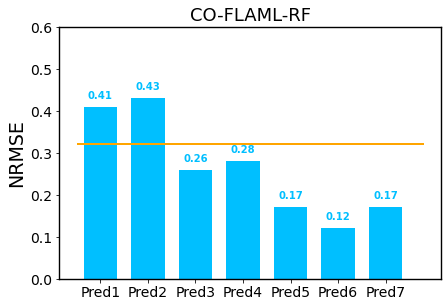

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig= plt.figure(figsize=(5.3,3.5))
ax = fig.add_axes([0,0,1,1])
x= ['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7']
students1=rmse
students2= [48,32,22,18,16]
plt.hlines([rmse_r], -0.5, 6.8, color='orange', linewidth=2)
x = np.arange(7)
wid= 0.7
graph1=ax.bar(x,students1,wid, color='#00BFFF', alpha=1)
#graph2=ax.bar(x+0.2,students2,wid, color='#00BFFF', alpha=1)
#plt.legend(['15min','60min'],title='Data resolution')
i= 0
for p in graph1:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.02,
             str(students1[i]),
             ha='center',
             weight='bold',fontsize=10, color='#00BFFF', alpha=1)
    i+=1

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['Pred1', 'Pred2', 'Pred3','Pred4','Pred5','Pred6','Pred7'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0,0.7, step=0.1))

#plt.xlabel('Tolerance,Tc (%)', fontsize=19)
plt.ylabel('NRMSE', fontsize=19)
plt.setp(ax.spines.values(), linewidth=1.4)
plt.title("CO-FLAML-RF",fontsize=18)
plt.savefig("Pred_CO_FLAML_RF.pdf", format="pdf", bbox_inches="tight")
plt.show()

X=CO_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour']]
y=CO_Data['Ref']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,shuffle=True)

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 1440,  # in seconds
    "metric": 'rmse',
    "eval_method":'holdout',
    "task": 'regression',
    "log_file_name": "california.log",
}

Pred=[]
rmse=[]
model=[]
RS=[]
R=[]
for i in range(10):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["rf"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    #print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    #print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)
    RS.append(R2)
    R.append(r)

print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

In [16]:
print(np.round(np.mean(R),2),np.round(np.mean(RS),2),np.round(np.mean(rmse),2))

NameError: name 'R' is not defined

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgboost"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-XGBoost',fontsize=16)
plt.savefig("co_xgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["xgb_limitdepth"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-LDXGBooost',fontsize=16)
plt.savefig("co_ldxgboost.pdf", format="pdf", bbox_inches="tight")

Pred=[]
rmse=[]
model=[]
for i in range(20):
    X_Train, X_Test, y_Train, y_Test =train_test_split(X_train,y_train,test_size = 0.2,shuffle=True)
    # Train with labeled input data
    automl.fit(X_train=X_Train.drop(['Lab1'], axis=1), y_train=y_Train,**automl_settings,estimator_list=["extra_tree"])
    pred=automl.predict(X_test.drop(['Lab1'], axis=1))
    R2=round(sm.r2_score(y_test, pred), 2)
    r=round(np.corrcoef(y_test, pred)[0, 1],2)
    RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),5)
    print(r,R2,RMSE)
    # Predict
    #print(automl.predict(X_test))
    # Print the best model
    print(automl.model.estimator)
    Pred.append(pred)
    rmse.append(RMSE)
    model.append(automl.model.estimator)

Sorted_pred=[]
sort_index = np.argsort(rmse)
for i in sort_index:
    Sorted_pred.append(Pred[i])
ind=[i for i in range(len(y_test))]
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(7,5))
plt.plot(ind[:200],y_test[:200], color='blue',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[1][:200],color='salmon',linewidth=1.5)
plt.plot(ind[:200],Sorted_pred[17][:200],color='teal',linewidth=1.5)
plt.legend(['Actual','p10','p90'],loc = 2, bbox_to_anchor = (0.75,1), fontsize=12)
#plt.plot(ind[:200],Sorted_pred[4][:200],color='black',linewidth=0.2)
#plt.fill_between(np.array(ind[:200]), np.array(Sorted_pred[0][:200]), np.array(Sorted_pred[4][:200]), 
                 #color='blue', alpha=0.15)
#plt.plot(ind,Pred[2],color='darkgoldenrod')
#plt.plot(ind,Pred[3],color='magenta')
#plt.plot(ind,Pred[4],color='purple')
plt.xlabel('Observation number',fontsize=16)
plt.ylabel('Concentraton (ppb)',fontsize=16)
plt.title('CO-Extra Tree',fontsize=16)
plt.savefig("co_extra_tree.pdf", format="pdf", bbox_inches="tight")

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

from flaml.model import SKLearnEstimator

from flaml.model import SKLearnEstimator
# SKLearnEstimator is derived from BaseEstimator
import numpy as np

class RandomForestRegressor(SKLearnEstimator):
    def __init__(self, task="binary", **config):
        super().__init__(task, **config)

        if task in CLASSIFICATION:
            from sklearn.ensemble import RandomForestClassifier

            self.estimator_class =RandomForestClassifier 
        else:
            from sklearn.ensemble import RandomForestRegressor

            self.estimator_class =RandomForestRegressor

    @classmethod
    def search_space(cls, data_size, task):
        space = {
            "n_estimators": {
                "domain": {"domain": tune.loguniform(lower=100, upper=20000)},
                "low_cost_init_value": 100,
            },
            "max_features": {
                "domain": tune.loguniform(lower=0.1, upper=1),
                "low_cost_init_value": 0.1,
            },
            "max_leaf_nodes": {
                "domain": tune.lograndint(lower=100, upper=2500),
                "low_cost_init_value": 100,},
            "min_samples_split": {"domain": tune.lograndint(lower=1, upper=20),
            "init_value": 20,},
            
            "min_samples_leaf": {
                "domain": tune.lograndint(lower=1, upper=20),
                "init_value": 20,
            },
        }
        return space

from flaml import AutoML
from flaml import tune
automl = AutoML()
automl.add_learner("rfr",RandomForestRegressor )

automl_settings = {
    "time_budget": 1000,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["rfr"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)

#  NO2 DATA

X=NO2_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_O3']]#'Ref_O3'
y=NO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#len(X_test)
X.shape

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab1'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

# O3 DATA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#,'Ref_CO','Ref_NO2','Ref_SO2'
X=O3_Data[['Net Signal','Lab1','Temp','RH','Month','Day_of_week','Hour','Ref_NO2']]#,'Ref_NO2'
y=O3_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab1'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab1'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

# SO2 DATA

In [ ]:
import pandas as pd
Ref=pd.read_csv('Ref.csv')
Ref["CO"] = 1000 * Ref["CO"]
Ref['Date'] = pd.to_datetime(Ref['Date_Time'])
Ref=Ref.set_index('Date')
Ref.drop('Date_Time',axis = 1, inplace = True)
Ref=Ref.resample('5min').mean()
Ref=Ref[76463:137376]
Ref_CO=Ref['CO'].to_list()
Ref_NO2=Ref['NO2'].to_list()
Ref_SO2=Ref['SO2'].to_list()
Ref_O3=Ref['O3'].to_list()

In [ ]:
import pandas as pd
import scipy.io
import numpy as np
data = pd.read_csv('Conc_SO2.txt', header = None,low_memory=False)
data.columns=['Lab2','Temp','RH','Time','Ref']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_so2=data
#signal=np.array(WE)-np.array(AE)
#Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data=SO2_Data.resample('5min').mean()
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna() 
data = pd.read_csv('SO2.txt', header = None,low_memory=False)
data.columns=['WE','AE','Temp','RH','Time']
Time=data['Time'].to_list()
time=[]
for i in range(len(Time)):
    time.append(float(abs(Time[i])))
Time=np.array(time)
Date=pd.to_datetime(Time-719529,unit='d').round('s')
data['Date'] = Date.tolist()
data=data.set_index('Date')
data.drop('Time',axis = 1, inplace = True)
data=data.resample('5min').mean()
Data_SO2=data
Data_SO2['Ref']=Ref_SO2
WE=Data_SO2['WE'].to_list()
AE=Data_SO2['AE'].to_list()
signal=np.array(WE)-np.array(AE)
Data_SO2['Lab2']=Data_so2['Lab2'].to_list()
Data_SO2['Net Signal']=signal
Data_SO2['Month']=Data_SO2.index.month
Data_SO2['Day_of_week']=Data_SO2.index.dayofweek
Data_SO2['Day']=Data_SO2.index.day
Data_SO2['Hour']=Data_SO2.index.hour
SO2_Data=Data_SO2
SO2_Data.shape

In [ ]:
SO2_Data=SO2_Data[(SO2_Data[SO2_Data.columns] >= 0).all(axis=1)]
SO2_Data=SO2_Data.dropna()
SO2_Data=SO2_Data.resample('h').mean()
SO2_Data=SO2_Data.dropna()
SO2_Data.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as sm
import matplotlib.pyplot as plt
#'Ref_CO','Ref_NO2','Ref_O3',
X=SO2_Data[['Net Signal','Lab2','Temp','RH','Month','Day_of_week','Hour']]
y=SO2_Data['Ref']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
len(X)

from flaml import AutoML
from sklearn.datasets import fetch_california_housing

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 200,  # in seconds
    "metric": 'rmse',
    "task": 'regression',
    "log_file_name": "california.log",
}
# Train with labeled input data
automl.fit(X_train=X_train.drop(['Lab2'], axis=1), y_train=y_train,**automl_settings,estimator_list=["xgboost"])
pred=automl.predict(X_test.drop(['Lab2'], axis=1))
R2=round(sm.r2_score(y_test, pred), 2)
r=round(np.corrcoef(y_test, pred)[0, 1],2)
RMSE=round(np.sqrt(sm.mean_squared_error(y_test, pred))/np.mean(y),2)
print(r,R2,RMSE)
# Predict
#print(automl.predict(X_test))
# Print the best model
print(automl.model.estimator)

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':  ['rbf', 'poly', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train.drop(['Lab2'], axis=1), y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)